In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics


In [47]:
train_df = pd.read_csv('training_sample.csv')

In [48]:
test_df = pd.read_csv('testing_sample.csv')

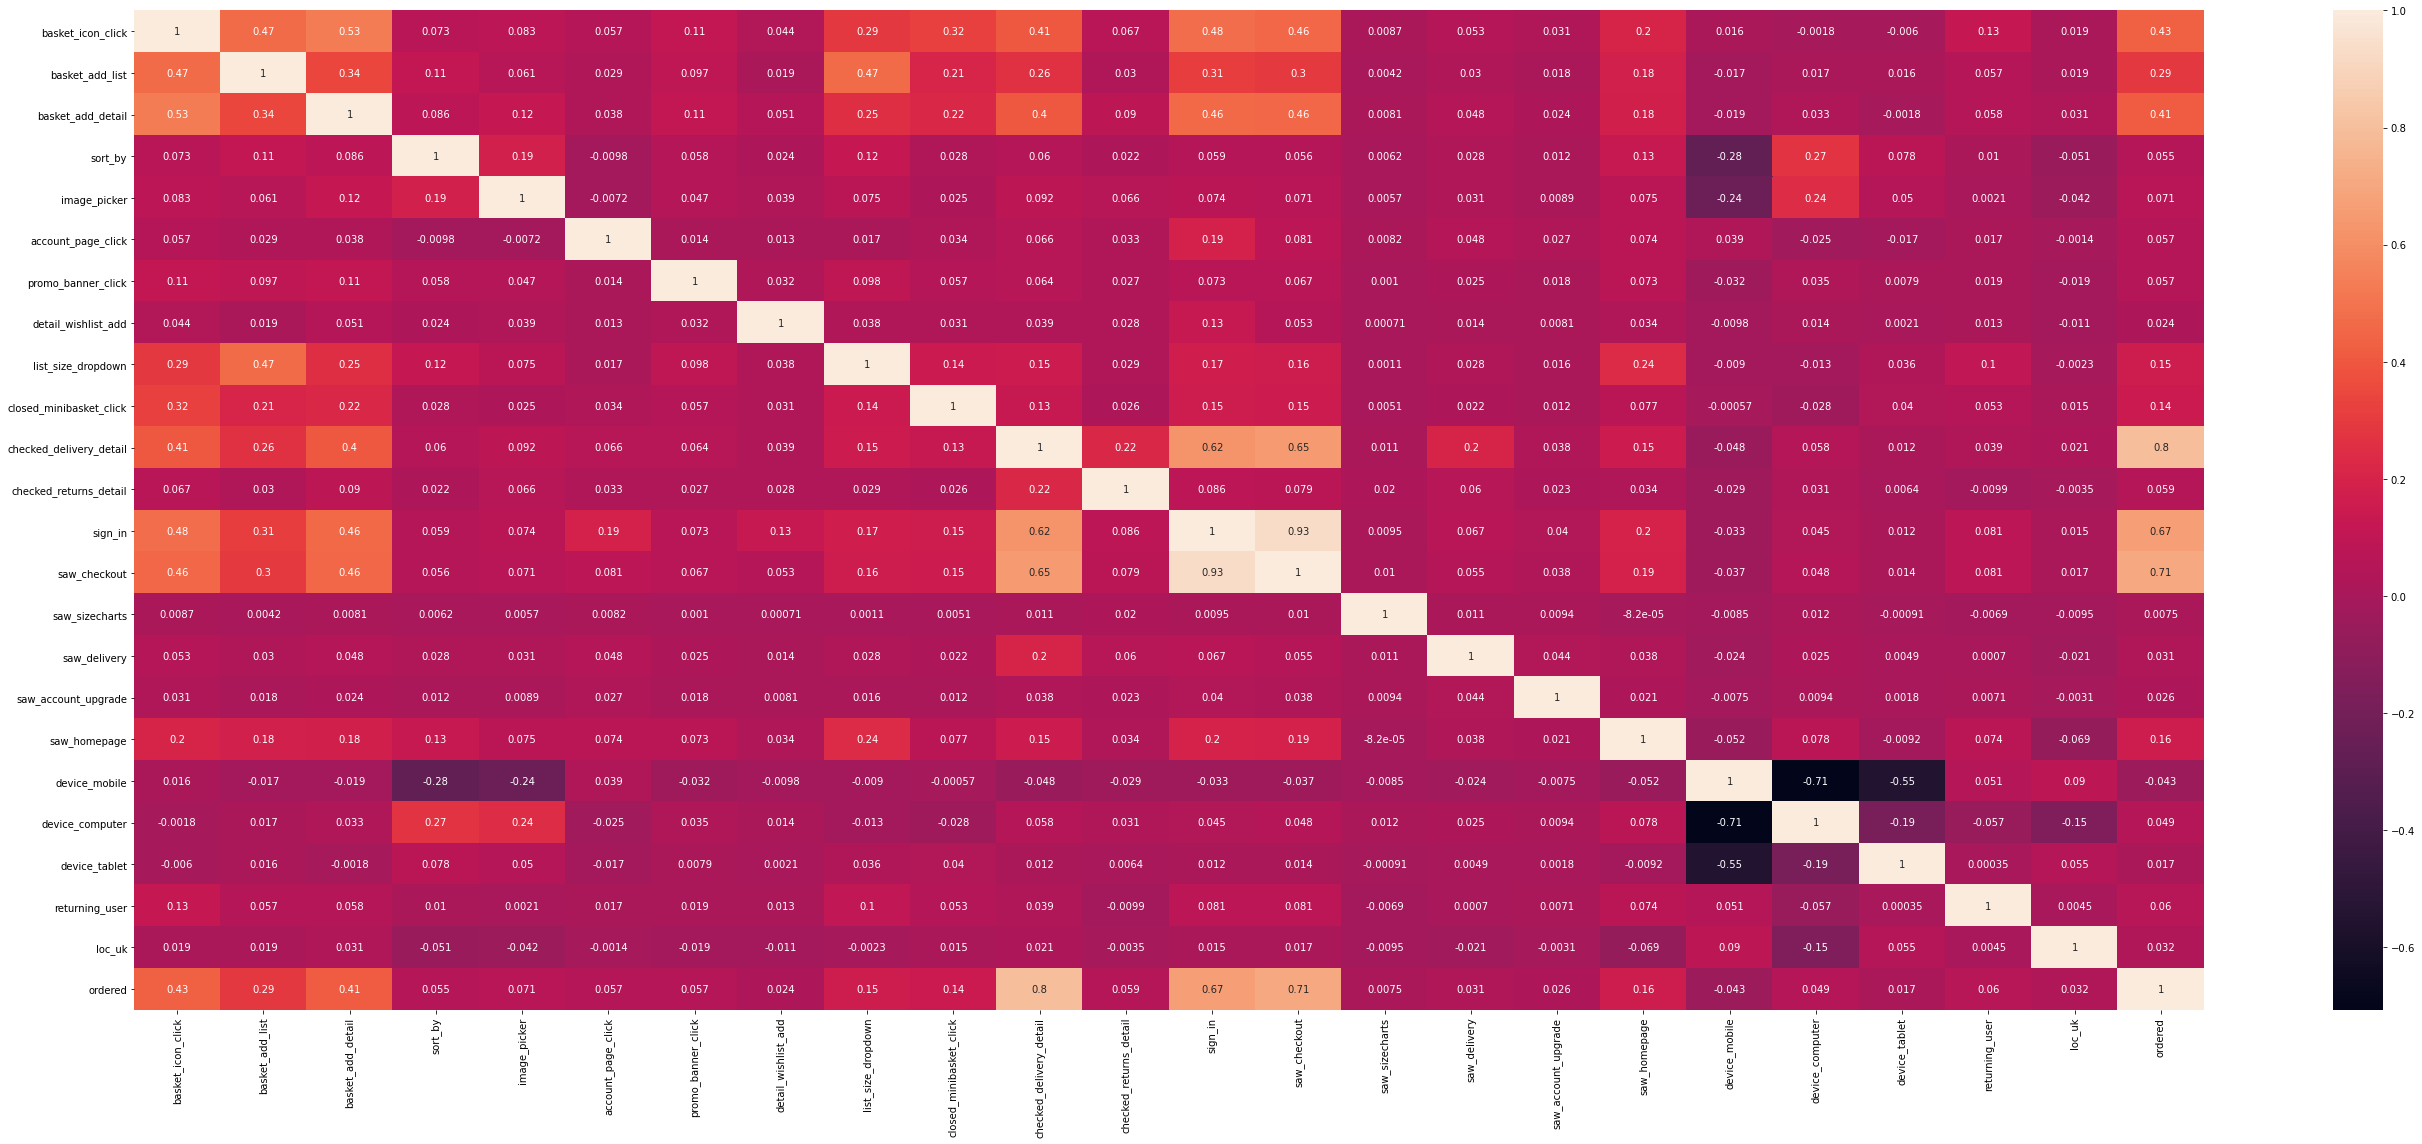

In [49]:
plt.figure(figsize = (38,16))
sns.heatmap(train_df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

#we need to remove any variables that have greater than 0.7 correlation with each other
#sign_in and saw_checkout -> remove sign_in
#device_computer and #device_mobile -> remove device_mobile

In [50]:
train_df.corr()['ordered']

basket_icon_click          0.428334
basket_add_list            0.287666
basket_add_detail          0.414420
sort_by                    0.054636
image_picker               0.071492
account_page_click         0.057279
promo_banner_click         0.056533
detail_wishlist_add        0.023516
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
checked_delivery_detail    0.798720
checked_returns_detail     0.059484
sign_in                    0.665556
saw_checkout               0.708986
saw_sizecharts             0.007548
saw_delivery               0.031461
saw_account_upgrade        0.025857
saw_homepage               0.157778
device_mobile             -0.042907
device_computer            0.049208
device_tablet              0.016939
returning_user             0.060295
loc_uk                     0.031643
ordered                    1.000000
Name: ordered, dtype: float64

In [51]:
x = train_df.loc[:, ~test_df.columns.isin(['UserID', 'ordered', 'sign_in', 'device_mobile'])] #dropping UserID, sign_in, device_mobile, ordered
y = train_df.ordered #only the ordered column

In [52]:
#splitting the dataset into 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5, stratify=y)

In [53]:
#Fitting a logistic regression model
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

#Using model to predict test dataset
y_pred=logistic_regression.predict(X_test)

In [54]:
#Using statsmodels to get coefficients and p values
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

x = add_constant(x)
print(Logit(y, x).fit().summary())

         Current function value: 0.020206
         Iterations: 35


C:\Users\jefft\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


                           Logit Regression Results                           
Dep. Variable:                ordered   No. Observations:               455401
Model:                          Logit   Df Residuals:                   455379
Method:                           MLE   Df Model:                           21
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.8839
Time:                        20:33:30   Log-Likelihood:                -9201.9
converged:                      False   LL-Null:                       -79247.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -26.7079    183.970     -0.145      0.885    -387.282     333.866
basket_icon_click           0.3828      0.044      8.714      0.000       0.297       0.469


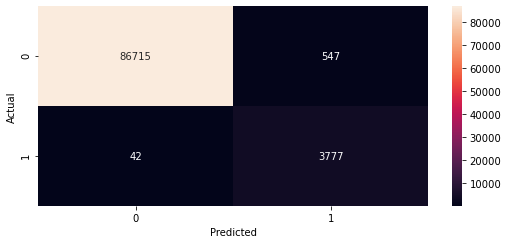

In [55]:
#Plotting confusion matrix

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [57]:
#Train Hit Rate

training_accuracy = logistic_regression.score(X_train, y_train)
print('Train Hit Rate: ', training_accuracy)

Train Hit Rate:  0.9930857487922705


In [59]:
#Test Hit Rate

print('Test Hit Rate: ',metrics.roc_auc_score(y_test, y_pred))

Test Hit Rate:  0.9913669389020034


In [16]:
#MODEL 2 Remove variables with p-value > 0.05
#removing "sort_by", "image_picker", promo_banner_click, saw_checkout, saw_sizecharts, 

train_df2 = pd.read_csv('training_sample.csv')

In [17]:
x2 = train_df2.loc[:, ~test_df.columns.isin(['UserID', 'ordered', 'sign_in', 'device_mobile','sort_by', 'image_picker','promo_banner_click','saw_checkout','saw_sizecharts'])] #dropping UserID, sign_in, device_mobile, ordered
y2 = train_df2.ordered #only the ordered column

In [18]:
#splitting the dataset into 80-20 train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.20, random_state=5, stratify=y2)

In [20]:
#Fitting a logistic regression model
logistic_regression2= LogisticRegression()
logistic_regression2.fit(X_train2,y_train2)

#Using model to predict test dataset
y_pred2=logistic_regression2.predict(X_test2)

In [21]:
#Using statsmodels to get coefficients and p values
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

x2 = add_constant(x2)
print(Logit(y2, x2).fit().summary())

Optimization terminated successfully.
         Current function value: 0.030209
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                ordered   No. Observations:               455401
Model:                          Logit   Df Residuals:                   455384
Method:                           MLE   Df Model:                           16
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.8264
Time:                        17:50:29   Log-Likelihood:                -13757.
converged:                       True   LL-Null:                       -79247.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -10.2961      0.114    -90.552      0.000     -10.519  

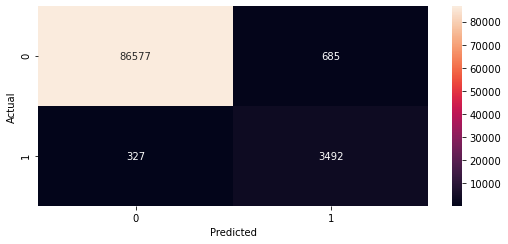

In [22]:
#Plotting confusion matrix

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
confusion_matrix2 = pd.crosstab(y_test2, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, fmt='g')

In [23]:
#Train Hit Rate

training_accuracy2 = logistic_regression2.score(X_train2, y_train2)
print('Train Hit Rate Model 2: ', training_accuracy2)

Train Hit Rate Model 2:  0.989026130873957


In [24]:
#Test Hit Rate

print('Test Hit Rate Model 2: ',metrics.accuracy_score(y_test2, y_pred2))

Test Hit Rate Model 2:  0.9888890108804251


In [26]:
#MODEL 3 
#Remove account_page_click, closed_minibasket_click, saw_account_upgrade

train_df3 = pd.read_csv('training_sample.csv')


In [27]:
x3 = train_df3.loc[:, ~test_df.columns.isin(['UserID', 'ordered', 'sign_in', 'device_mobile','sort_by', 'image_picker','promo_banner_click','saw_checkout','saw_sizecharts','account_page_click','closed_minibasket_click','saw_account_upgrade'])] 
y3 = train_df3.ordered #only the ordered column

In [29]:
#splitting the dataset into 80-20 train test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.20, random_state=5, stratify=y3)

In [30]:
#Fitting a logistic regression model
logistic_regression3= LogisticRegression()
logistic_regression3.fit(X_train3,y_train3)

#Using model to predict test dataset
y_pred3=logistic_regression3.predict(X_test3)

In [31]:
#Using statsmodels to get coefficients and p values
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

x3 = add_constant(x3)
print(Logit(y3, x3).fit().summary())

Optimization terminated successfully.
         Current function value: 0.030214
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                ordered   No. Observations:               455401
Model:                          Logit   Df Residuals:                   455387
Method:                           MLE   Df Model:                           13
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.8264
Time:                        18:11:02   Log-Likelihood:                -13760.
converged:                       True   LL-Null:                       -79247.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -10.2919      0.114    -90.566      0.000     -10.515  

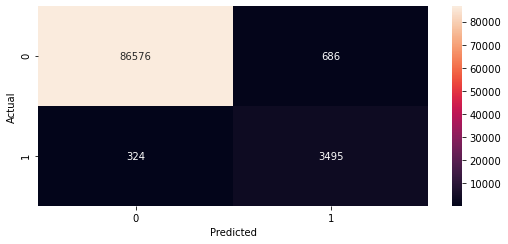

In [32]:
#Plotting confusion matrix

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
confusion_matrix3 = pd.crosstab(y_test3, y_pred3, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix3, annot=True, fmt='g')

In [33]:
#Train Hit Rate

training_accuracy3 = logistic_regression3.score(X_train3, y_train3)
print('Train Hit Rate Model 3: ', training_accuracy3)

Train Hit Rate Model 3:  0.9890425999121651


In [34]:
#Test Hit Rate

print('Test Hit Rate Model 3: ',metrics.accuracy_score(y_test3, y_pred3))

Test Hit Rate Model 3:  0.988910969356946


In [38]:
#MODEL 4 - Using basket_add_detail as the dependent variable

train_df4 = pd.read_csv('training_sample.csv')

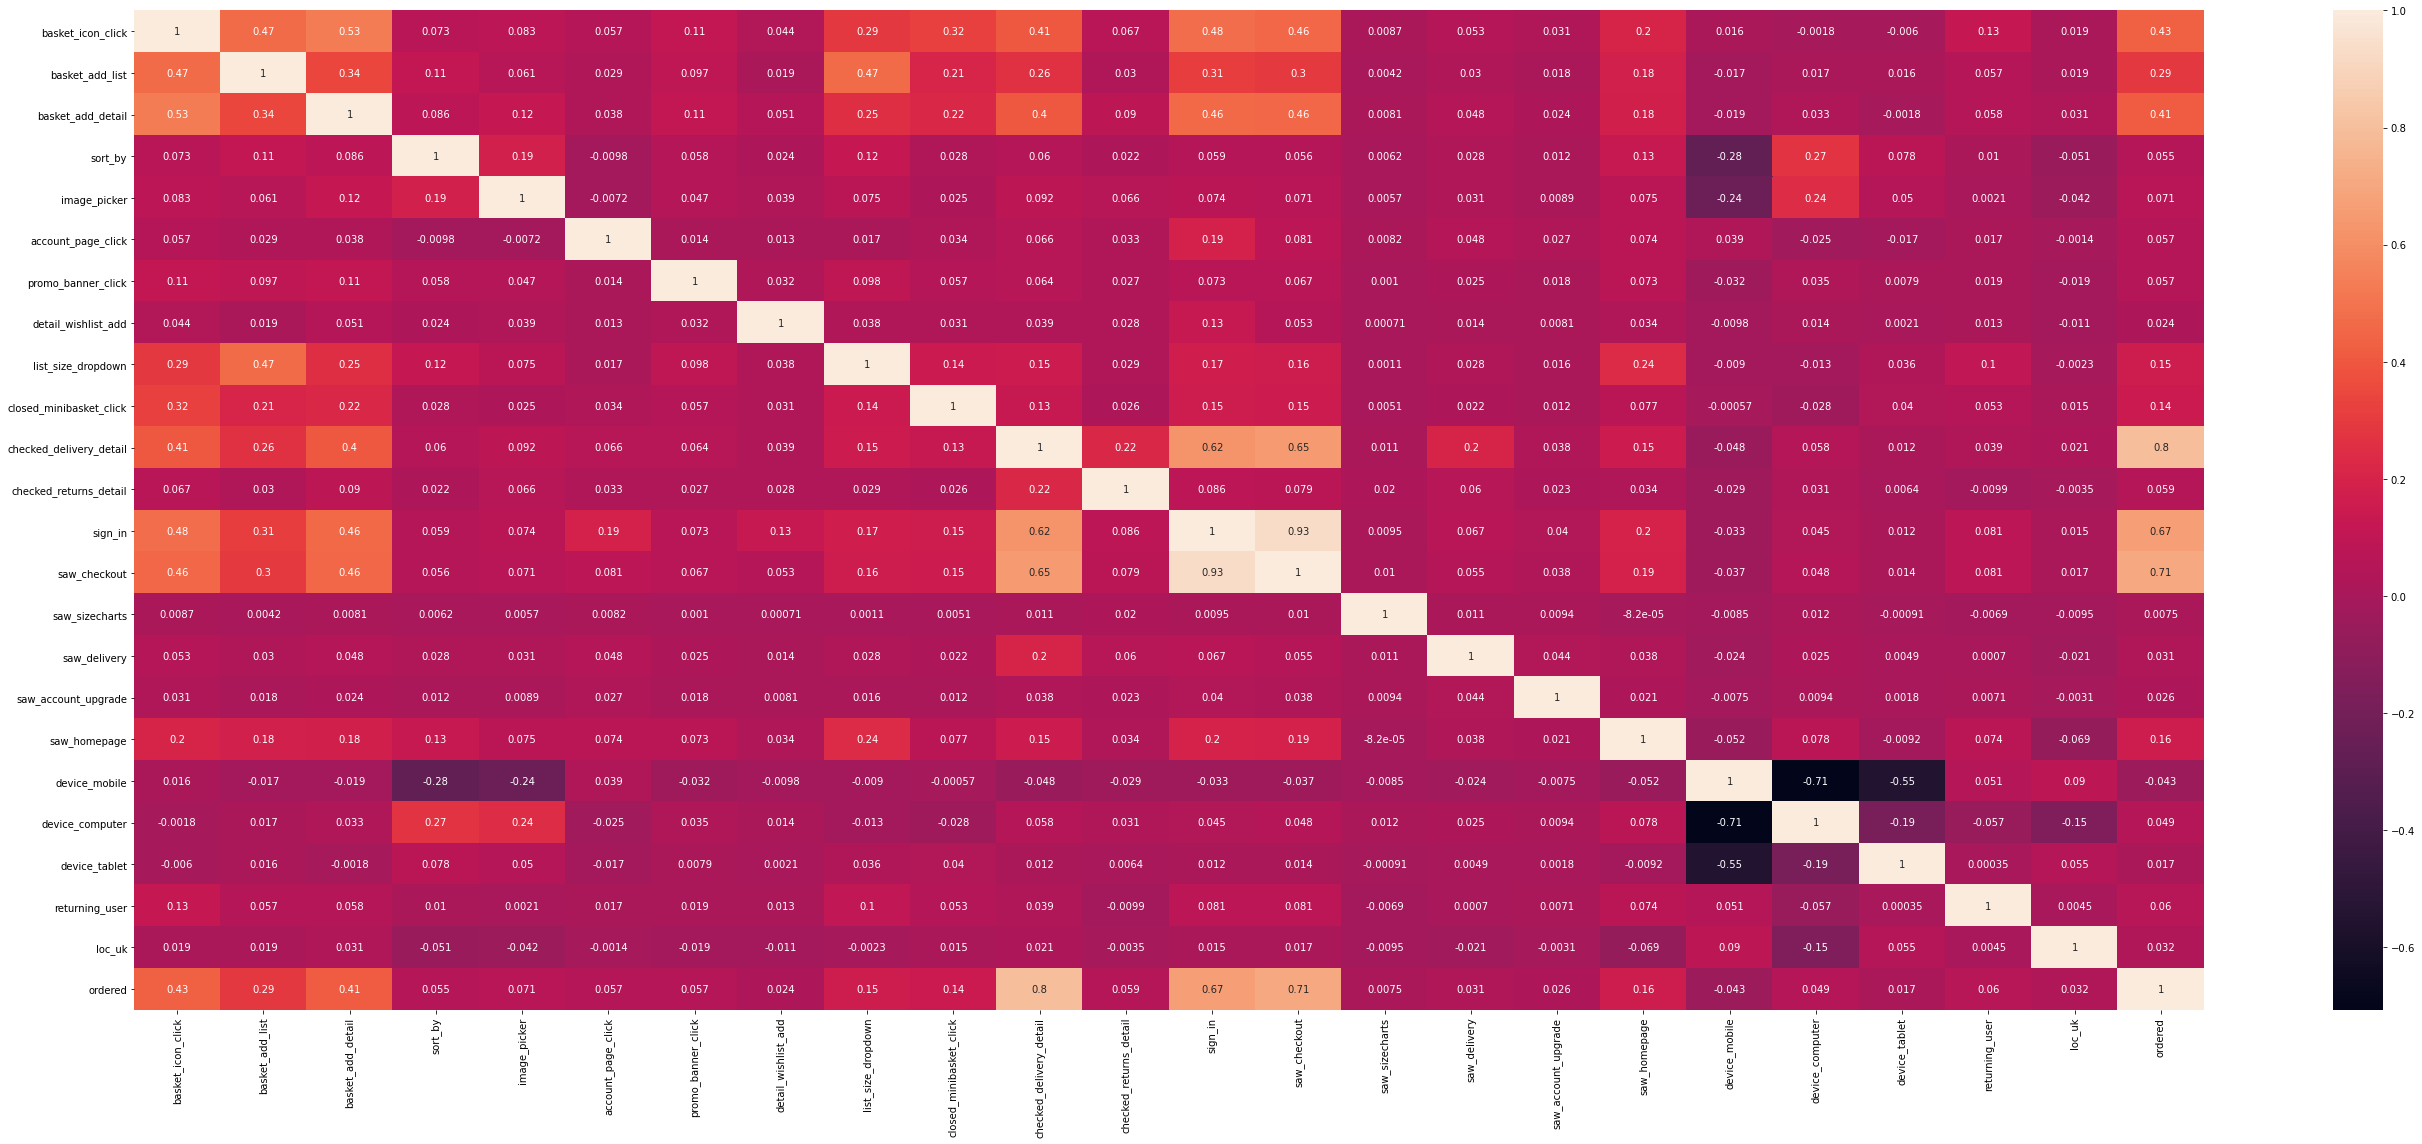

In [39]:
plt.figure(figsize = (38,16))
sns.heatmap(train_df4.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

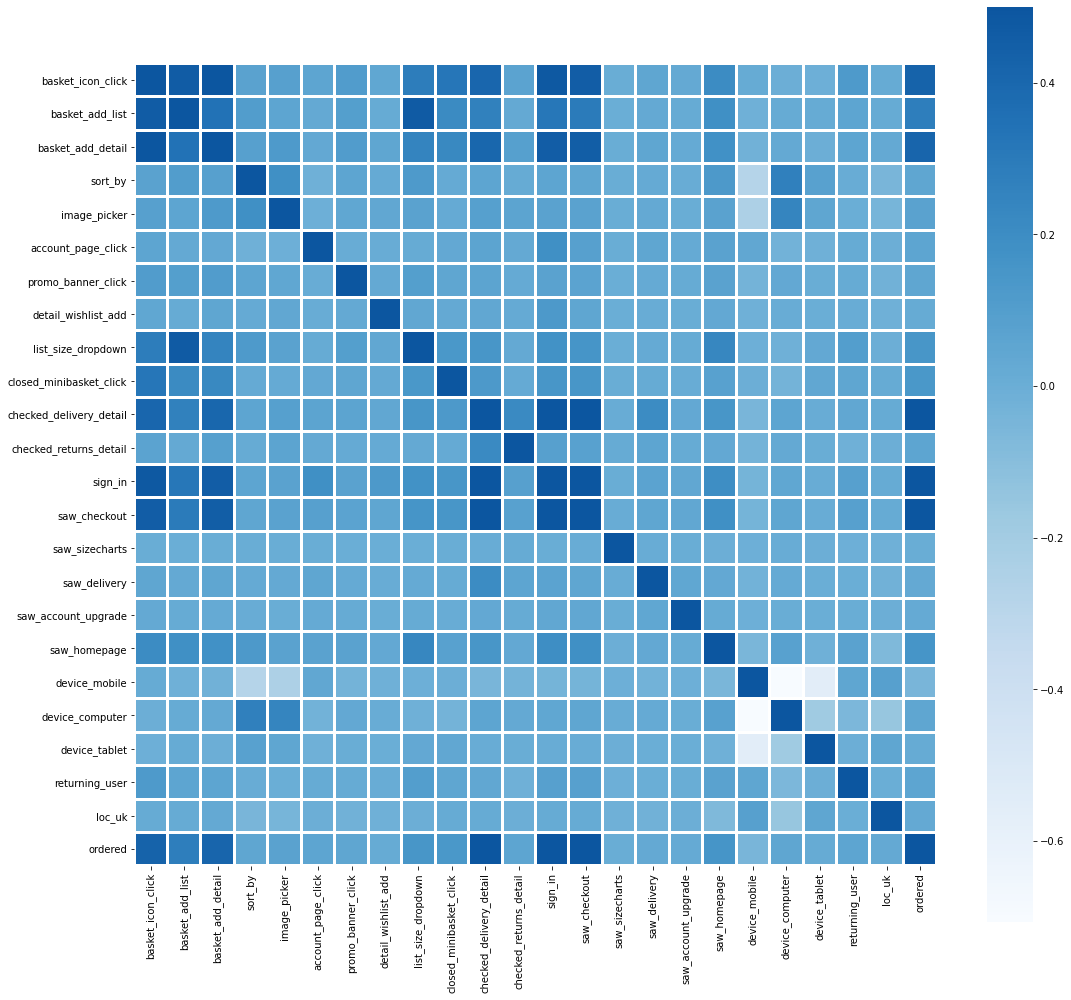

In [42]:
corr = train_df.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [46]:
train_df.corr()['basket_add_detail']

basket_icon_click          0.529947
basket_add_list            0.340968
basket_add_detail          1.000000
sort_by                    0.085854
image_picker               0.124230
account_page_click         0.037502
promo_banner_click         0.109043
detail_wishlist_add        0.050724
list_size_dropdown         0.247205
closed_minibasket_click    0.222444
checked_delivery_detail    0.404134
checked_returns_detail     0.090434
sign_in                    0.461659
saw_checkout               0.456713
saw_sizecharts             0.008101
saw_delivery               0.048410
saw_account_upgrade        0.024255
saw_homepage               0.175138
device_mobile             -0.018800
device_computer            0.032794
device_tablet             -0.001799
returning_user             0.057680
loc_uk                     0.030956
ordered                    0.414420
Name: basket_add_detail, dtype: float64

In [36]:

x4 = train_df4.loc[:, ~test_df.columns.isin(['UserID', 'ordered', 'sign_in'])] 
y4 = train_df4.basket_add_detail #only the basket_add_detail column

In [37]:
#splitting the dataset into 80-20 train test split
X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.20, random_state=5, stratify=y4)

In [40]:
#Fitting a logistic regression model
logistic_regression4= LogisticRegression()
logistic_regression4.fit(X_train4,y_train4)

#Using model to predict test dataset
y_pred4=logistic_regression4.predict(X_test4)

In [41]:
#Using statsmodels to get coefficients and p values
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

x4 = add_constant(x4)
print(Logit(y4, x4).fit().summary())

         Current function value: 0.000000
         Iterations: 35


C:\Users\jefft\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


                           Logit Regression Results                           
Dep. Variable:      basket_add_detail   No. Observations:               455401
Model:                          Logit   Df Residuals:                   455378
Method:                           MLE   Df Model:                           22
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                   1.000
Time:                        19:59:13   Log-Likelihood:               -0.18631
converged:                      False   LL-Null:                   -1.6056e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -21.9135   2801.220     -0.008      0.994   -5512.203    5468.376
basket_icon_click           2.1230      8.903      0.238      0.812     -15.327      19.573


In [72]:
#MODEL 5 - Use variables that resulted in more order

train_df5 = pd.read_csv('training_sample.csv')

In [73]:
x5 = train_df5.loc[:, ~train_df5.columns.isin(['UserID', 'ordered', 'basket_add_list','sort_by','image_picker','account_page_click','promo_banner_click','detail_wishlist_add','list_size_dropdown','closed_minibasket_click','checked_returns_detail','saw_checkout','saw_sizecharts','saw_delivery','saw_account_upgrade','saw_homepage','device_mobile','device_computer','device_tablet','loc_uk'])] #dropping UserID, sign_in, device_mobile, ordered
y5 = train_df5.ordered #only the ordered column

In [74]:
#splitting the dataset into 80-20 train test split
X_train5, X_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size=0.20, random_state=5, stratify=y5)

In [75]:
#Fitting a logistic regression model
logistic_regression5= LogisticRegression()
logistic_regression5.fit(X_train5,y_train5)

#Using model to predict test dataset
y_pred5=logistic_regression5.predict(X_test5)

In [76]:
#Using statsmodels to get coefficients and p values
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

x5 = add_constant(x5)
print(Logit(y5, x5).fit().summary())

Optimization terminated successfully.
         Current function value: 0.023768
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                ordered   No. Observations:               455401
Model:                          Logit   Df Residuals:                   455395
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.8634
Time:                        23:22:37   Log-Likelihood:                -10824.
converged:                       True   LL-Null:                       -79247.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -10.6648      0.117    -91.009      0.000     -10.895  

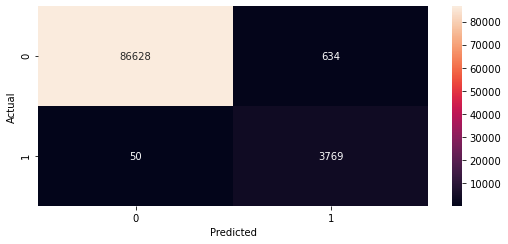

In [77]:
#Plotting confusion matrix

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
confusion_matrix5 = pd.crosstab(y_test5, y_pred5, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix5, annot=True, fmt='g')

In [78]:
#Train Hit Rate

training_accuracy5 = logistic_regression5.score(X_train5, y_train5)
print('Train Hit Rate Model 5: ', training_accuracy5)

Train Hit Rate Model 5:  0.9920481993851559


In [79]:
#Test Hit Rate

print('Test Hit Rate Model 5: ',metrics.accuracy_score(y_test5, y_pred5))

Test Hit Rate Model 5:  0.9924902010298525


In [88]:
#MODEL 6 - Only use checked delivery detail

train_df6 = pd.read_csv('training_sample.csv')

In [89]:
x6 = train_df6.loc[:, ~train_df6.columns.isin(['UserID', 'ordered', 'basket_add_list','sort_by','image_picker','account_page_click','promo_banner_click','detail_wishlist_add','list_size_dropdown','closed_minibasket_click','checked_returns_detail','saw_checkout','saw_sizecharts','saw_delivery','saw_account_upgrade','saw_homepage','device_mobile','device_computer','device_tablet','loc_uk','basket_icon_click ','basket_add_detail','sign_in','returning_user','basket_icon_click'])] #dropping UserID, sign_in, device_mobile, ordered
y6 = train_df6.ordered #only the ordered column

In [90]:
#splitting the dataset into 80-20 train test split
X_train6, X_test6, y_train6, y_test6 = train_test_split(x6, y6, test_size=0.20, random_state=5, stratify=y6)

In [91]:
#Fitting a logistic regression model
logistic_regression6= LogisticRegression()
logistic_regression6.fit(X_train6,y_train6)

#Using model to predict test dataset
y_pred6=logistic_regression6.predict(X_test6)

In [92]:
#Using statsmodels to get coefficients and p values
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

x6 = add_constant(x6)
print(Logit(y6, x6).fit().summary())

Optimization terminated successfully.
         Current function value: 0.044062
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                ordered   No. Observations:               455401
Model:                          Logit   Df Residuals:                   455399
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Dec 2021   Pseudo R-squ.:                  0.7468
Time:                        10:05:30   Log-Likelihood:                -20066.
converged:                       True   LL-Null:                       -79247.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -7.6803      0.071   -107.774      0.000      -7.820  

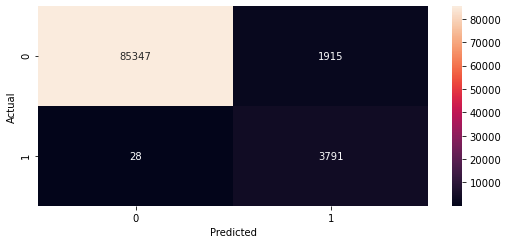

In [93]:
#Plotting confusion matrix

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
confusion_matrix6 = pd.crosstab(y_test6, y_pred6, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix6, annot=True, fmt='g')

In [94]:
#Train Hit Rate

training_accuracy6 = logistic_regression6.score(X_train6, y_train6)
print('Train Hit Rate Model 6: ', training_accuracy6)

Train Hit Rate Model 6:  0.9780659859464207


In [95]:
#Test Hit Rate

print('Test Hit Rate Model 6: ',metrics.accuracy_score(y_test6, y_pred6))

Test Hit Rate Model 6:  0.9786673400599466
